# ML - Model  추가

220405 / CNN(4) / 3:14

---

https://colab.research.google.com/drive/1StIDi_nbt49LL01FzBtxxcvpSSgI9-xy#scrollTo=-l4CViARu4d2

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn import metrics

# 암 진단 데이터 (분류)
cancer = datasets.load_breast_cancer()
# 보스턴 집값 데이터 (회귀)
boston = datasets.load_boston()

C:\Users\JAY\anaconda3\envs\webai\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [3]:
dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=["Y"])
df_cancer = pd.concat([dfX, dfy], axis=1)

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["Y"])
df_boston = pd.concat([dfX, dfy], axis=1)

In [4]:

df_cancer = df_cancer.sample(frac=1).reset_index(drop=True)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,13.05,18.59,85.09,512.0,0.10820,0.1304,0.09603,0.05603,0.2035,0.06501,...,24.85,94.22,591.2,0.13430,0.2658,0.2573,0.12580,0.3113,0.08317,1
1,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.33390,0.18450,0.1829,0.06782,...,33.62,211.70,2562.0,0.15730,0.6076,0.6476,0.28670,0.2355,0.10510,0
2,14.26,18.17,91.22,633.1,0.06576,0.0522,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.2167,0.1565,0.07530,0.2636,0.07676,1
3,14.53,19.34,94.25,659.7,0.08388,0.0780,0.08817,0.02925,0.1473,0.05746,...,28.39,108.10,830.5,0.10890,0.2649,0.3779,0.09594,0.2471,0.07463,1
4,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.06390,...,30.86,109.50,826.4,0.14310,0.3026,0.3194,0.15650,0.2718,0.09353,0


In [5]:
df_boston = df_boston.sample(frac=1).reset_index(drop=True)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61,30.3
1,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93,20.1
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1
3,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,14.0
4,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3


---

### 지도학습

### KNN

In [6]:
from sklearn import neighbors

In [7]:
# classification

X = df_cancer.iloc[:450, :-1] # 독립변수
y = df_cancer.iloc[:450, -1:] # 종속변수
testx = df_cancer.iloc[450:, :-1] # 테스트 데이터 분리
testy = df_cancer.iloc[450:, -1:]

knn_model = neighbors.KNeighborsClassifier() # 모델선택
knn_model.fit(X, y) # 학습

# 모델 평가
y_pred = knn_model.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

0.9411764705882353
[[36  5]
 [ 2 76]]


C:\Users\JAY\anaconda3\envs\webai\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
# regression

X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

knn_model = neighbors.KNeighborsRegressor()
knn_model.fit(X, y)

# 학습한 데이터로 평가
y_pred = knn_model.predict(X)
print(metrics.mean_squared_error(y, y_pred) ** 0.5)
print(metrics.r2_score(y, y_pred))

# 모르는 데이터로 평가
y_pred = knn_model.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

5.1720664256282625
0.7037437524015552
5.503572865486046
-0.6578484600541195


5.1720664256282625  
0.7037437524015552  
5.503572865486046  
-0.6578484600541195 <- R^2 음수라면, 평균보다 못한... 엉망이다

---

### Linear / Logistic

In [9]:
from sklearn import linear_model

In [10]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

logit = linear_model.LogisticRegression(max_iter=5000)
logit.fit(X, y)

y_pred = logit.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

0.9327731092436975
[[26  1]
 [ 7 85]]


In [ ]:
# 0.9327731092436975  : 정확도 (93%)  
# [[26  1]   [참예측=참,   1     ]  
#  [ 7 85]]  [ 7, 거짓예측 = 거짓]

In [11]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

linear = linear_model.LinearRegression()
linear.fit(X, y)

y_pred = linear.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

3.3774255386059195
0.37565166960622753


---

### Ridge / Lasso / ElasticNet

---

- Ridge : L2 loss
- Lasso : L1 loss
- ElasticNet : L1 + L2

In [12]:
from sklearn import linear_model

In [13]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

ridge = linear_model.Ridge(max_iter=1000)
ridge.fit(X, y)

print("ridge")
y_pred = ridge.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

lasso = linear_model.Lasso(max_iter=1000)
lasso.fit(X, y)

print("lasso")
y_pred = lasso.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

elastic = linear_model.ElasticNet(max_iter=1000)
elastic.fit(X, y)

print("elastic")
y_pred = elastic.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

ridge
3.4551260178628693
0.3465939182217851
lasso
3.5361499192026917
0.31558940029904414
elastic
3.619456173717858
0.28296222902760815


In [14]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

ridge = linear_model.Ridge(max_iter=1000)
ridge.fit(X, y)

print("ridge")
y_pred = ridge.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

lasso = linear_model.Lasso(max_iter=1000)
lasso.fit(X, y)

print("lasso")
y_pred = lasso.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

elastic = linear_model.ElasticNet(max_iter=1000)
elastic.fit(X, y)

print("elastic")
y_pred = elastic.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

ridge
3.4551260178628693
0.3465939182217851
lasso
3.5361499192026917
0.31558940029904414
elastic
3.619456173717858
0.28296222902760815


---

### Dicision Tree

In [15]:
from sklearn import tree

In [16]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

y_pred = tree_model.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

0.8823529411764706
[[25  2]
 [12 80]]


4.0204388530891215
0.11528719871990001


[Text(0.6793402719188715, 0.975, 'X[5] <= 6.941\nsquared_error = 90.294\nsamples = 450\nvalue = 23.044'),
 Text(0.4375311107923866, 0.925, 'X[12] <= 14.4\nsquared_error = 43.078\nsamples = 378\nvalue = 20.201'),
 Text(0.20779372806425486, 0.875, 'X[7] <= 1.385\nsquared_error = 27.184\nsamples = 232\nvalue = 23.614'),
 Text(0.13792943439524838, 0.825, 'X[12] <= 10.83\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.13576960718142547, 0.775, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.14008926160907129, 0.775, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.2776580217332613, 0.825, 'X[5] <= 6.543\nsquared_error = 15.199\nsamples = 227\nvalue = 23.13'),
 Text(0.14440891603671707, 0.775, 'X[12] <= 9.66\nsquared_error = 8.406\nsamples = 175\nvalue = 21.773'),
 Text(0.06652436555075594, 0.725, 'X[9] <= 222.5\nsquared_error = 7.238\nsamples = 84\nvalue = 23.102'),
 Text(0.03914686825053996, 0.675, 'X[7] <= 4.33\nsquared_error = 14.062\nsamples = 2\nval

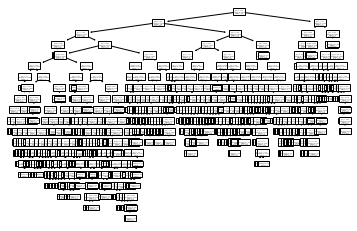

In [17]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

model = tree.DecisionTreeRegressor()
model.fit(X, y)

y_pred = model.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

tree.plot_tree(model)

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.4230769230769231, 0.75, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nsquared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\nsquared_error = 0.02\nsamples = 48\nvalue = 1.021'),
 Text(0.07692307692307693, 0.25, 'squared_error = 0.0\nsamples = 47\nvalue = 1.0'),
 Text(0.23076923076923078, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nsquared_error = 0.222\nsamples = 6\nvalue = 1.667'),
 Text(0.38461538461538464, 0.25, 'squared_error = 0.0\nsamples = 3\nvalue = 2.0'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\nsquared_error = 0.222\nsamples = 3\nvalue = 1.333'),
 Text(0.46153846153846156

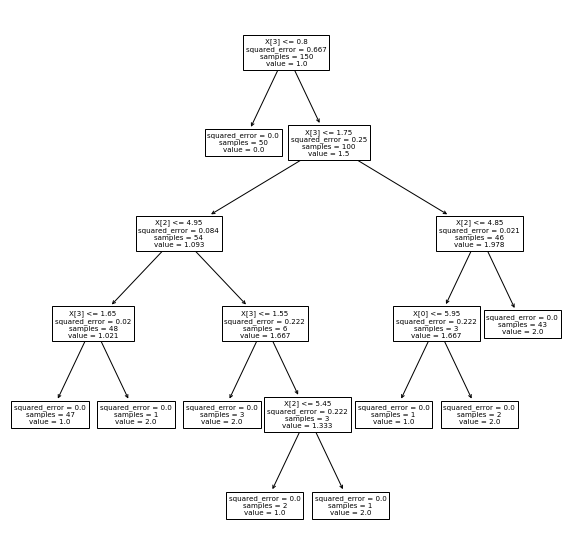

In [18]:
iris = datasets.load_iris()

plt.figure(figsize=(10, 10))
tree.plot_tree(model.fit(iris.data, iris.target)) 

---

### Rnadom Forest

In [19]:
from sklearn import ensemble

In [20]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

forest = ensemble.RandomForestClassifier()
forest.fit(X, y)

y_pred = forest.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

0.9747899159663865
[[27  0]
 [ 3 89]]


In [21]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

forest = ensemble.RandomForestRegressor()
forest.fit(X, y)

y_pred = forest.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

3.556039274449674
0.3078687051273822


---

### Boosting

In [25]:
from sklearn import ensemble

In [26]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

adaboost = ensemble.AdaBoostClassifier()
adaboost.fit(X, y)

y_pred = adaboost.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

0.9411764705882353
[[26  1]
 [ 6 86]]


In [27]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

adaboost = ensemble.AdaBoostRegressor()
adaboost.fit(X, y)

y_pred = adaboost.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

4.190367096282228
0.038920020353554574


C:\Users\JAY\AppData\Local\Temp\ipykernel_28080\4148141141.py:5: RuntimeWarning: divide by zero encountered in true_divide
  alpha = 0.5 * np.log((1 - epsilon) / epsilon)


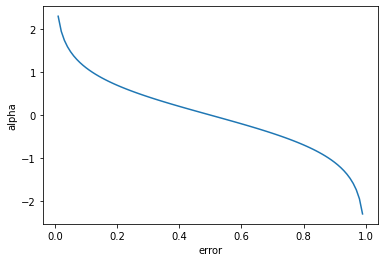

In [28]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = np.arange(0, 1., 0.01)
alpha = 0.5 * np.log((1 - epsilon) / epsilon)

plt.plot(epsilon, alpha)
plt.xlabel('error')
plt.ylabel('alpha')
plt.show()

---

### Gradient Boosting

In [ ]:
from sklearn import ensemble

In [ ]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

gradintboost = ensemble.GradientBoostingClassifier()
gradintboost.fit(X, y)

y_pred = gradintboost.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

In [ ]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

gradintboost = ensemble.GradientBoostingRegressor()
gradintboost.fit(X, y)

y_pred = gradintboost.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

---

https://docs.google.com/presentation/d/1IS3qRavO3q-w3ej9fCofw0uFsqMEzIumH-xWYb8RWYc/edit#slide=id.g1027777ea9b_0_938

### 앙상블 모델
 - 모델들의 민주주의

### 랜덤 포레스트
 - 모델 여러개를 가지고, 각각 모덷들이 다른 결과를 낸다.
 - 이런 결과들을 모아서 하는게 앙상블

### 기본 개념
 - 1인 1표제 (모델들의 민주주의) => 오버피팅 회피하는 획기적인 방법
 - 모델이 여러개이므로 한 모델이 오버피팅 된다고 해도, 나머지가 방어해줌
 
<img src="./img/m1.png" width=80% height=80%>

- 트리1 : 퇴사 7 : 버텨 3
- 트리2 : 퇴사 9 : 버텨 1 ... 라면,
- 확률들을 더한다. 이때, 어떻게 의사결정을 할것인지가 핵심

---

### Baggind vs Boosting

<img src="./img/m2.png" width=80% height=80%>

- 부스팅 기법을 쓴 모델이 정확도가 높다.
- AdaBoost
- Gradient Boost
- XGboost

---
Bagging 모델
 - x:data 에서, 각 일부로 x1, x2, x3 만든다. 따라서 데이터들이 다른 모델을 만들어서, 그 결과도 독립적이다. 
 - 각모델의 가중치 등을 줘서 모델을 합쳐서 사용

Boosting (오답에 더 집중)
- x:data 로 x를 학습하고, 틀린데이터를 가지고 x' 를 학습하고, 또 틀린거로 x'' 를 학습함
- 서로 앞에서 만든 모델의 틀린데이터를 학습하므로 정확도를 높인다. (오답에 높은 가중치)
- 다만, 앙상블임에도 오버피팅 가능성이 있음
- outlier에 취약
- 순차학습이므로 속도가 느림 (성능은 좋으나 느림)

---

AdaBoost
 - 모델을 생성한 후, 오류 데이터에 가중치 부여
 - 모델의 오류를 가지고 모델의 Weight 계산
 
Gradient Boost
 - 모델을 생성한 후, 오류 데이터에 가중치 부여
 - Gradient Descent를 이용하여 모델의 Weight 계산
 - 과적합의 가능성이 높음

---
XGBoost 나 Light BGM 은 속도를 개선시킨 모델

---

### Bagging

In [ ]:
from sklearn import ensemble

In [ ]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

bagging = ensemble.BaggingClassifier()
bagging.fit(X, y)

y_pred = bagging.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

0.9243697478991597
[[26  1]
 [ 8 84]]


In [ ]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

bagging = ensemble.BaggingRegressor()
bagging.fit(X, y)

y_pred = bagging.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

4.045526850732794
0.10421133100807867


---

### 현재 가장 많이 쓰이는 2개 : XG Boost / Light GBM

- 표의 경우, 딥러닝으로 성능이 안나올때, 위 두개를 사용하면 잘 나온다.

- 성능을 더 높이고 싶을때
    - xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
    - lgb_model = lgb.LGBMRegressor()
    - 의 파라미터를 조정할 수있다.

---

트리 모델의 앙상블 모델

- 트리모델 : 나무모양

---

### XG Boost

- https://github.com/dmlc/xgboost
- https://arxiv.org/pdf/1603.02754.pdf

In [1]:
# pip install xgboost

In [39]:
import pandas as pd
import xgboost as xgb

In [40]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

[18:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9747899159663865
[[27  0]
 [ 3 89]]


C:\Users\JAY\anaconda3\envs\webai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [41]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

4.0467318225681534
0.10367762506192169


In [2]:
# pip install graphviz

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xgb_model, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()

https://free-eunb.tistory.com/14

---

### Light GBM

- https://github.com/microsoft/LightGBM
- https://kicarussays.tistory.com/38
- https://papers.nips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf

In [ ]:
import lightgbm as lgb

In [ ]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X, y)

y_pred = lgb_model.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

In [ ]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X, y)

y_pred = lgb_model.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

In [ ]:
import matplotlib.pyplot as plt

lgb.plot_tree(lgb_model, tree_index=1)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()

---

### voting

In [ ]:
from sklearn import neighbors
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

In [ ]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

model1 = neighbors.KNeighborsClassifier()
model2 = linear_model.LogisticRegression(max_iter=5000)
model3 = tree.DecisionTreeClassifier()

voting = ensemble.VotingClassifier(estimators=[('knn', model1), ('lr', model2), ('tree', model3)], voting='soft')
voting.fit(X, y)

y_pred = voting.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

In [ ]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

model1 = neighbors.KNeighborsRegressor()
model2 = linear_model.LinearRegression()
model3 = tree.DecisionTreeRegressor()

voting = ensemble.VotingRegressor(estimators=[('knn', model1), ('lr', model2), ('tree', model3)])
voting.fit(X, y)

y_pred = voting.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

---

## Stacking

In [ ]:
from sklearn import ensemble

In [ ]:
# classification
X = cancer.data[:450, :]
y = cancer.target[:450]
testx = cancer.data[450:, :]
testy = cancer.target[450:]

model1 = neighbors.KNeighborsClassifier()
model2 = linear_model.LogisticRegression(max_iter=5000)
model3 = tree.DecisionTreeClassifier()

stack = ensemble.StackingClassifier(estimators=[('knn', model1), ('lr', model2), ('tree', model3)])
stack.fit(X, y)

y_pred = stack.predict(testx)
print(metrics.accuracy_score(testy, y_pred))
print(metrics.confusion_matrix(testy, y_pred))

In [ ]:
# regression
X = boston.data[:450, :]
y = boston.target[:450]
testx = boston.data[450:, :]
testy = boston.target[450:]

model1 = neighbors.KNeighborsRegressor()
model2 = linear_model.LinearRegression()
model3 = tree.DecisionTreeRegressor()

stack = ensemble.StackingRegressor(estimators=[('knn', model1), ('lr', model2), ('tree', model3)])
stack.fit(X, y)

y_pred = stack.predict(testx)
print(metrics.mean_squared_error(testy, y_pred) ** 0.5)
print(metrics.r2_score(testy, y_pred))

---
---
---

# 비지도 학습

### K-means

In [ ]:
from sklearn import cluster

In [ ]:
model = cluster.KMeans(init="k-means++", n_clusters=2, random_state=0)
model.fit(cancer.data)
y_pred = model.labels_

y_pred

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

feature = data[ ['Sepal length','Sepal width']]
feature.head()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']


In [ ]:
r = pd.concat([feature, predict],axis=1)
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

plt.show()


- Inertia value를 이용한 적정 군집수 판단

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


- 크로스 테이블 체크를 이용한 모델 판단

In [ ]:
ct = pd.crosstab(data['labels'], r['predict'])
print(ct)

---

### Hierarchical

In [ ]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data, labels], axis=1)

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20, 10))
dendrogram(mergings,
           labels=labels.values,
           leaf_rotation=90,
           leaf_font_size=8
)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(mergings, 3, criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)


---

### DBSCAN

In [ ]:
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

In [ ]:

from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()


In [ ]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

---

### PCA

In [ ]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=labels['labels'], alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()


In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=labels['labels'])
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=labels['labels']);
plt.show();


---

### T-SNE

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(feature)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=labels['labels'])

plt.show()

---

### MNIST

In [ ]:
from sklearn import metrics
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) / 255

In [ ]:
from sklearn import linear_model

logit_model = linear_model.LogisticRegression(max_iter=10, multi_class='multinomial')
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn import linear_model

logit_model = linear_model.RidgeClassifier(max_iter=10)
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn import tree

logit_model = tree.DecisionTreeClassifier()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn import ensemble

logit_model = ensemble.RandomForestClassifier(n_estimators=10)
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn import ensemble

logit_model = ensemble.BaggingClassifier()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn import ensemble

logit_model = ensemble.GradientBoostingClassifier(n_estimators=10)
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn import ensemble

logit_model = ensemble.AdaBoostClassifier()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax", random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(objective="multiclass")
lgb_model.fit(x_train, y_train)
y_pred = lgb_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

---
---
---

ResNet 이 설명력이 높은 이유

<img src="./img/c24.png" width=80% height=80%>

- 최종에 도달할수 있는 가지수가 굉장히 많음
- 그 가지 수 들이 모두 앙상블이라고 생각하면됨. (정확도 높아짐)
- (boosting 모델 : 잔차를 획기적으로 줄이는 모델)